In [1]:
from pathlib import Path

import os

import pandas as pd

In [2]:
%run "../read_and_write_docs.py"

In [3]:
%run "../scorer.py"

/Users/user/my_env/lib/python3.10/site-packages/threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


In [14]:
unknown = read_jsonl_file("../../../../datasets/blogger/raw_error_fix/unknown_preprocessed.jsonl")

In [5]:
# Get the list of files in the rephrased sentences loc
# rephrased_sentences_loc = f"{g_drive_base_loc}datasets/blogger_new_algorithm/rephrased_sentences/"
# rephrased_sentences_loc = "../../../datasets/blogger/phi_rephrased"
rephrased_sentences_loc = "../../../../datasets/blogger/phi_rephrased"
save_score_dir = "../../../../datasets/blogger/phi_parascore"

# Ensure the output directory exists
os.makedirs(save_score_dir, exist_ok=True)

files = [file for file in Path(rephrased_sentences_loc).iterdir() if file.is_file() and file.suffix == '.jsonl']
already_processed = [file for file in Path(save_score_dir).iterdir() if file.is_file() and file.suffix == '.jsonl']

In [9]:
# Convert processed files to a set of basenames (without directory path)
processed_basenames = {p.name for p in already_processed}

# Filter the unprocessed files by removing those that have already been processed
files_to_process = [p for p in files if p.name not in processed_basenames]

In [10]:
len(files_to_process)

100

In [7]:
# Initialize with the score type 'parascore_free'
parascore_free = ParaphraseScorer(score_type='parascore_free', model_type='bert-base-uncased')

In [25]:
df = read_jsonl_file(files[0])
merged_df = df.merge(unknown, left_on=['doc_id', 'chunk_id'], right_on=['id', 'chunk_id'], how='left')
merged_df = merged_df.rename(columns={'result': 'rephrased', 'text': 'original'})
merged_df = merged_df[['doc_id', 'chunk_id', 'original', 'rephrased']]
merged_df['chunk_id'] = merged_df['chunk_id'].astype(str)

In [26]:
merged_df

,doc_id,chunk_id,original,rephrased
0,350617,0,Why does the Poet need a voice for his express...,The poet requires a voice as an essential inst...
1,350617,0,Why does the Poet need a voice for his express...,"Just as any musician needs an instrument, a po..."
2,350617,0,Why does the Poet need a voice for his express...,A voice is the poet's tool for sharing their i...
3,350617,0,Why does the Poet need a voice for his express...,"For the poet, language is not just communicati..."
4,350617,0,Why does the Poet need a voice for his express...,A poet's voice acts as their signature in the ...
...,...,...,...,...
841,350617,14,On the path of the declaration of the war agai...,The Poet embarks on an ambitious journey again...
842,350617,14,On the path of the declaration of the war agai...,Embarking on an ambitious journey to declare w...
843,350617,14,On the path of the declaration of the war agai...,The Poet embarks on an ambitious journey to de...
844,350617,14,On the path of the declaration of the war agai...,The Poet sets forth an ambitious journey to de...


In [28]:
df_with_score = parascore_free.calculate_score(merged_df)

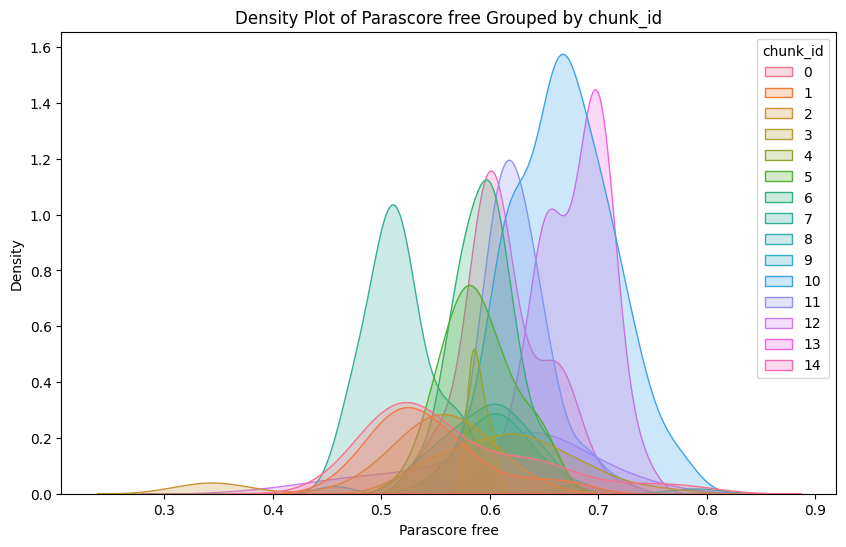

In [29]:
parascore_free.plot_density(df_with_score, grouping_column='chunk_id')

In [24]:
failed_files = []

for file in files_to_process:
    print(f"Processing File: {file}")
    try:
        # Load the DataFrame
        df = read_jsonl_file(file)

        df = read_jsonl_file(files[0])

        # New updates to merge Phi files
        merged_df = df.merge(unknown, left_on=['doc_id', 'chunk_id'], right_on=['id', 'chunk_id'], how='left')
        merged_df = merged_df.rename(columns={'result': 'rephrased', 'text': 'original'})
        merged_df = merged_df[['doc_id', 'chunk_id', 'original', 'rephrased']]
        
        # Calculate the score
        df_with_score = parascore_free.calculate_score(merged_df)
    
        # Define the output file path
        output_file = os.path.join(save_score_dir, os.path.basename(file))
    
        # Save the modified DataFrame to the new location
        save_as_jsonl(df_with_score, output_file)
        
        print(f"Processed and saved: {output_file}")
    
    except Exception as e:
        # If any error occurs, log the file that failed and the error message
        print(f"Failed to process {file}: {e}")
        failed_files.append(file)

Processing File: ../../../../datasets/blogger/phi_rephrased/doc_350617.jsonl
Processed and saved: ../../../../datasets/blogger/phi_parascore/doc_350617.jsonl
Processing File: ../../../../datasets/blogger/phi_rephrased/doc_202213.jsonl
Processed and saved: ../../../../datasets/blogger/phi_parascore/doc_202213.jsonl
Processing File: ../../../../datasets/blogger/phi_rephrased/doc_184355.jsonl
Processed and saved: ../../../../datasets/blogger/phi_parascore/doc_184355.jsonl
Processing File: ../../../../datasets/blogger/phi_rephrased/doc_214228.jsonl
Processed and saved: ../../../../datasets/blogger/phi_parascore/doc_214228.jsonl
Processing File: ../../../../datasets/blogger/phi_rephrased/doc_526719.jsonl
Processed and saved: ../../../../datasets/blogger/phi_parascore/doc_526719.jsonl
Processing File: ../../../../datasets/blogger/phi_rephrased/doc_334376.jsonl
Processed and saved: ../../../../datasets/blogger/phi_parascore/doc_334376.jsonl
Processing File: ../../../../datasets/blogger/phi_re